In [1]:
import pandas as pd
from collections import Counter

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime #To check start and end time when running code
from tqdm import tqdm #This is for creating progress bars.
import logging #This is to provide logging of information when running the LDA
import sys #This is to disable logging when it's no longer needed
import pickle #To store and open previously saved machine learning models 

#Importing NLTK and NLP packages
import nltk
from nltk.tokenize import TweetTokenizer
import string
import re
from collections import defaultdict

#Importing packages for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#Importing packages for LDA
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore


In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...


True

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
df = pd.read_excel("meat_new.xlsx")

In [10]:
df

id                       date      screen_name  \
0       1608434073344802818  2022-12-29 12:05:41+00:00          kryphos   
1       1608434070207315974  2022-12-29 12:05:40+00:00     OldKerrang81   
2       1608433992105168898  2022-12-29 12:05:21+00:00     Eloi15260176   
3       1608433978029051909  2022-12-29 12:05:18+00:00          gurnaik   
4       1608433928632963075  2022-12-29 12:05:06+00:00   MichelleRule78   
...                     ...                        ...              ...   
154208  1605598843466240007  2022-12-21 16:19:29+00:00        fitz__bot   
154209  1605598828568133633  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  1605598807072264192  2022-12-21 16:19:20+00:00          1fstcsx   
154211  1605598743906045952  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  1605598736364711936  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                     text  favourite_count  \
0       @sarjinus @curious_founder On a hunch, it's be...                0   
1       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...                0   
2       @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...                0   
3       @DavidParr1980 A streaming channel devoted to ...                0   
4                                      @SlimJim MEAT 😁😁😁😁                0   
...                                                   ...              ...   
154208  These aren't just pots. This limited bargain a...                0   
154209  Wow, guess I'll have to find a new way to make...                0   
154210  @MmmGrilled @FoxNews They don’t! \nEven with C...                0   
154211  @sak_shoes This looks delicious !!\n\nI've bee...                0   
154212  @mondestereo @ilEnigma46 @efjaebe @andrew_lili...                0   

        retweet_count             reply_id  
0                   0  1608236185209520129  
1                   0                 None  
2                   0  1608303124908806144  
3                   0  1608433310270914563  
4                   0  1608178472874131456  
...               ...                  ...  
154208              0                 None  
154209              0                 None  
154210              0  1605519603550916608  
154211              0  1605595149995753474  
154212              0  1605577071622643713  

[154213 rows x 7 columns]

In [573]:
#df.head(10)

In [576]:
df.drop(df.columns[0],axis = 1)

date      screen_name  \
0       2022-12-29 12:05:41+00:00          kryphos   
1       2022-12-29 12:05:40+00:00     OldKerrang81   
2       2022-12-29 12:05:21+00:00     Eloi15260176   
3       2022-12-29 12:05:18+00:00          gurnaik   
4       2022-12-29 12:05:06+00:00   MichelleRule78   
...                           ...              ...   
154208  2022-12-21 16:19:29+00:00        fitz__bot   
154209  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  2022-12-21 16:19:20+00:00          1fstcsx   
154211  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                          @sarjinus @curious_founder On a hunch, it's because meat is ridiculously subsidised, while the alternatives are not.   
1                                                                                                                                                                                                                                                                       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOAF https://t.co/3p9qAKGdfn   
2                                                                                            @Avignon85 @Nlr_2 @jakesinprison @barstoolsports How’s Killians meat taste because that was barely even a shove you’re just quick to defend him because you don’t know what a cheap shot is that cheap shot was that swing to the back of the head   
3                                                                                                                                                                                                                                                                           @DavidParr1980 A streaming channel devoted to meat of mixed origin.   
4                                                                                                                                                                                                                                                                                                                            @SlimJim MEAT 😁😁😁😁   
...                                                                                                                                                                                                                                                                                                                                         ...   
154208                                                                                                                                                                                                                        These aren't just pots. This limited bargain all-purpose doesn't need to be sharpened, and with meat and bones...   
154209                                                                                                                                                                                          Wow, guess I'll have to find a new way to make ends meet. Maybe I'll start selling cock meat salad! #FinancialStruggles https://t.co/s4uSyBJtSB   
154210                                                              @MmmGrilled @FoxNews They don’t! \nEven with CKD I am sure I am better health than you at my age.\nLion Diet; do you realize the life span of a lion is 10-16 years?\nI like meat, however this is ridiculous unless you are supplementing vegetable sources in other

In [577]:
df

id                       date      screen_name  \
0       1608434073344802818  2022-12-29 12:05:41+00:00          kryphos   
1       1608434070207315974  2022-12-29 12:05:40+00:00     OldKerrang81   
2       1608433992105168898  2022-12-29 12:05:21+00:00     Eloi15260176   
3       1608433978029051909  2022-12-29 12:05:18+00:00          gurnaik   
4       1608433928632963075  2022-12-29 12:05:06+00:00   MichelleRule78   
...                     ...                        ...              ...   
154208  1605598843466240007  2022-12-21 16:19:29+00:00        fitz__bot   
154209  1605598828568133633  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  1605598807072264192  2022-12-21 16:19:20+00:00          1fstcsx   
154211  1605598743906045952  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  1605598736364711936  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                          @sarjinus @curious_founder On a hunch, it's because meat is ridiculously subsidised, while the alternatives are not.   
1                                                                                                                                                                                                                                                                       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOAF https://t.co/3p9qAKGdfn   
2                                                                                            @Avignon85 @Nlr_2 @jakesinprison @barstoolsports How’s Killians meat taste because that was barely even a shove you’re just quick to defend him because you don’t know what a cheap shot is that cheap shot was that swing to the back of the head   
3                                                                                                                                                                                                                                                                           @DavidParr1980 A streaming channel devoted to meat of mixed origin.   
4                                                                                                                                                                                                                                                                                                                            @SlimJim MEAT 😁😁😁😁   
...                                                                                                                                                                                                                                                                                                                                         ...   
154208                                                                                                                                                                                                                        These aren't just pots. This limited bargain all-purpose doesn't need to be sharpened, and with meat and bones...   
154209                                                                                                                                                                                          Wow, guess I'll have to find a new way to make ends meet. Maybe I'll start selling cock meat salad! #FinancialStruggles https://t.co/s4uSyBJtSB   
154210                                                              @MmmG

## word count

In [21]:
with open('stopwords.txt','r') as file:
    stop_words = file.read()
stopwords_list = stop_words.split()
stopwords_list

['a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',

In [22]:
word_join = ' '.join(df['Q3'])
word_all = word_join.split()
word_all = [x.lower() for x in word_all]

In [23]:


word_clean = [x for x in word_all if x not in stopwords_list]


In [24]:
word_count = Counter(word_clean)
word_count_sort = word_count.most_common(50)

In [25]:
word_count_sort

[('fun', 360),
 ('looks', 315),
 ('cool', 262),
 ('play', 184),
 ('kids', 165),
 ('build', 158),
 ('lego', 157),
 ('love', 148),
 ('look', 130),
 ('child', 119),
 ('lot', 102),
 ('interesting', 100),
 ('set', 99),
 ('son', 91),
 ('sets', 90),
 ('city', 81),
 ("it's", 79),
 ('theme', 68),
 ('children', 68),
 ('looked', 63),
 ('enjoy', 60),
 ('building', 59),
 ('pieces', 56),
 ('space', 54),
 ('pretty', 52),
 ('it’s', 50),
 ('excited', 49),
 ('nice', 48),
 ('little', 46),
 ('playing', 46),
 ('liked', 45),
 ('idea', 44),
 ('imagination', 43),
 ('creative', 43),
 ('unique', 41),
 ('boys', 39),
 ('realistic', 38),
 ('it.', 37),
 ('police', 36),
 ('themes', 36),
 ('vehicles', 35),
 ('sets.', 34),
 ('interested', 34),
 ('cool.', 33),
 ('concept', 33),
 ('fire', 33),
 ('legos', 33),
 ('learn', 31),
 ('loves', 30),
 ('buy', 30)]

## topic modeling

In [11]:
#Reusing and tweaking the function for preprocessing from last week to fit specifics of this dataset.

def preprocess(text):
    
    #Lowercasing words
    text = text.lower()
    
    #Removing '&amp' which was found to be common
    text = re.sub(r'&amp','', text)
    
    #Replace other instances of "&" with "and"
    text = re.sub(r'&','and', text)
    
    #Removing mentions 
    text = re.sub(r'@\w+ ', '', text)
    
    #Removing 'RT' and 'via'
    text = re.sub(r'(^rt|^via)((?:\b\W*@\w+)+): ', '', text)
    
    #Removing punctuation
    
    my_punctuation = string.punctuation.replace('#','')
    my_punctuation = my_punctuation.replace('-','')
    
    text = text.translate(str.maketrans('', '', my_punctuation))
    text = re.sub(r' - ','', text) #removing dash lines bounded by whitespace (and therefore not part of a word)
    text = re.sub(r'[’“”—,!]','',text) #removing punctuation that is not captured by string.punctuation
    
    #Removing odd special characters
    text = re.sub(r"[┻┃━┳┓┏┛┗]","", text)
    text = re.sub(r"\u202F|\u2069|\u200d|\u2066","", text)
    
    #Removing URLs
    text = re.sub(r'http\S+', '', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]','', text)
    
    #Removing separators and superfluous whitespace
    text = text.strip()
    text = re.sub(r' +',' ',text)
    
    #Removing emoji
    emoji_pattern = re.compile("[^\U00000000-\U0000d7ff\U0000e000-\U0000ffff]", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', text)
    
    #Tokenizing
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    
    return tokens
    

def preprocess_lemma(tokens):
    
    #Running the preprocess function
    tokens = preprocess(tokens)
    
    #Lemmatizing
    tag_map = defaultdict(lambda : nltk.corpus.wordnet.NOUN)      #POS map
    tag_map['J'] = nltk.corpus.wordnet.ADJ
    tag_map['V'] = nltk.corpus.wordnet.VERB
    tag_map['R'] = nltk.corpus.wordnet.ADV    
    
    lemmatizer = nltk.WordNetLemmatizer()             #Creating lemmatizer.
    text_lemmatized = []                              #Empty list to save lemmatized sentence

    for word, tag in nltk.pos_tag(tokens):
        lemma = lemmatizer.lemmatize(word, tag_map[tag[0]])
        text_lemmatized.append(lemma)
    
    tokens = text_lemmatized

    #Removing stopwords
    stop_words_list = nltk.corpus.stopwords.words("english")
    
    other = ['❤','♂','♀','نمشے','fuck','fucking','fuckin','-']
    
    text = " ".join([i for i in tokens if i not in stop_words_list + other])
    
    return text

def preprocess_stem(tokens):
    
    #Running the preprocess function
    tokens = preprocess(tokens)
    
    #Removing stopwords
    stop_words_list = nltk.corpus.stopwords.words("english")
    
    other = ['❤','♂','♀','نمشے','fuck','fucking','fuckin','-']
    
    tokens = [i for i in tokens if i not in stop_words_list + other]
    
    #Stemming
    stemmer = nltk.PorterStemmer()    #Creating stemmer
    sent_stemmed = []                 #Empty list to save stemmed sentence
    
    for word in tokens:
        stem = stemmer.stem(word)     #Stemming words
        sent_stemmed.append(stem)
        
    tokens = sent_stemmed
    
    return " ".join(tokens)

In [636]:
text = "I am a string with emoji❤ lol ♂ get rid ♂_️ little meat_rid ❤_️ and other Unicode characters 比如中文."

In [664]:
#NON_BMP_RE = re.compile("[^\U00000000-\U0000d7ff\U0000e000-\U0000ffff]", flags=re.UNICODE)
special = ['❤','♂']
other = ['I','a','m']

text1 = [i for i in text if i not in special + other]

#"text1 = ''.join([i for i in text1 if i not in other]

In [665]:
text1

[' ',
 ' ',
 ' ',
 's',
 't',
 'r',
 'i',
 'n',
 'g',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'e',
 'o',
 'j',
 'i',
 ' ',
 'l',
 'o',
 'l',
 ' ',
 ' ',
 'g',
 'e',
 't',
 ' ',
 'r',
 'i',
 'd',
 ' ',
 '_',
 '️',
 ' ',
 'l',
 'i',
 't',
 't',
 'l',
 'e',
 ' ',
 'e',
 't',
 '_',
 'r',
 'i',
 'd',
 ' ',
 '_',
 '️',
 ' ',
 'n',
 'd',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'U',
 'n',
 'i',
 'c',
 'o',
 'd',
 'e',
 ' ',
 'c',
 'h',
 'r',
 'c',
 't',
 'e',
 'r',
 's',
 ' ',
 '比',
 '如',
 '中',
 '文',
 '.']

In [12]:
#Preprocessing and lemmatizing (takes approx. 10 mins)

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " Preprocessing begun.") #Printing start time

tqdm.pandas() #Getting a progress bar. Use progress_apply instead of apply.
df['text_lemma'] = df['text'].progress_apply(lambda x: preprocess_lemma(x))

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " Preprocessing completed.") #Printing end time

2023-01-05 00:05:58 Preprocessing begun.


100%|██████████| 154213/154213 [05:13<00:00, 492.43it/s]

2023-01-05 00:11:11 Preprocessing completed.


In [13]:
df['text_stemmed'] = df['text'].progress_apply(lambda x: preprocess_stem(x))

100%|██████████| 154213/154213 [02:01<00:00, 1268.15it/s]


In [671]:
df

id                       date      screen_name  \
0       1608434073344802818  2022-12-29 12:05:41+00:00          kryphos   
1       1608434070207315974  2022-12-29 12:05:40+00:00     OldKerrang81   
2       1608433992105168898  2022-12-29 12:05:21+00:00     Eloi15260176   
3       1608433978029051909  2022-12-29 12:05:18+00:00          gurnaik   
4       1608433928632963075  2022-12-29 12:05:06+00:00   MichelleRule78   
...                     ...                        ...              ...   
154208  1605598843466240007  2022-12-21 16:19:29+00:00        fitz__bot   
154209  1605598828568133633  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  1605598807072264192  2022-12-21 16:19:20+00:00          1fstcsx   
154211  1605598743906045952  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  1605598736364711936  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                          @sarjinus @curious_founder On a hunch, it's because meat is ridiculously subsidised, while the alternatives are not.   
1                                                                                                                                                                                                                                                                       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOAF https://t.co/3p9qAKGdfn   
2                                                                                            @Avignon85 @Nlr_2 @jakesinprison @barstoolsports How’s Killians meat taste because that was barely even a shove you’re just quick to defend him because you don’t know what a cheap shot is that cheap shot was that swing to the back of the head   
3                                                                                                                                                                                                                                                                           @DavidParr1980 A streaming channel devoted to meat of mixed origin.   
4                                                                                                                                                                                                                                                                                                                            @SlimJim MEAT 😁😁😁😁   
...                                                                                                                                                                                                                                                                                                                                         ...   
154208                                                                                                                                                                                                                        These aren't just pots. This limited bargain all-purpose doesn't need to be sharpened, and with meat and bones...   
154209                                                                                                                                                                                          Wow, guess I'll have to find a new way to make ends meet. Maybe I'll start selling cock meat salad! #FinancialStruggles https://t.co/s4uSyBJtSB   
154210                                                              @MmmG

In [585]:
#df.to_csv('lego_preprocessed.csv.bz2', compression = 'bz2')

In [586]:
#lego_df = pd.read_csv('lego_preprocessed.csv.bz2', compression = 'bz2')

In [14]:
df_needed = df[['date','screen_name','text','text_lemma','text_stemmed']].copy()

In [15]:
df_needed.head()

date     screen_name  \
0  2022-12-29 12:05:41+00:00         kryphos   
1  2022-12-29 12:05:40+00:00    OldKerrang81   
2  2022-12-29 12:05:21+00:00    Eloi15260176   
3  2022-12-29 12:05:18+00:00         gurnaik   
4  2022-12-29 12:05:06+00:00  MichelleRule78   

                                                text  \
0  @sarjinus @curious_founder On a hunch, it's be...   
1  December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...   
2  @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...   
3  @DavidParr1980 A streaming channel devoted to ...   
4                                 @SlimJim MEAT 😁😁😁😁   

                                          text_lemma  \
0      hunch meat ridiculously subsidise alternative   
1                  december kerrang advert meat loaf   
2  hows killians meat taste barely even shove you...   
3         streaming channel devote meat mixed origin   
4                                               meat   

                                        text_stemmed  
0                 hunch meat ridicul subsidis altern  
1                    decemb kerrang advert meat loaf  
2  how killian meat tast bare even shove your qui...  
3               stream channel devot meat mix origin  
4                                               meat

In [31]:
#df.gender.astype(str)

In [16]:
df_clean = df_needed[~df_needed["text"].str.contains(r'@\w+meat', regex=True, case=False)] 

In [17]:
df_clean

date      screen_name  \
0       2022-12-29 12:05:41+00:00          kryphos   
1       2022-12-29 12:05:40+00:00     OldKerrang81   
2       2022-12-29 12:05:21+00:00     Eloi15260176   
3       2022-12-29 12:05:18+00:00          gurnaik   
4       2022-12-29 12:05:06+00:00   MichelleRule78   
...                           ...              ...   
154208  2022-12-21 16:19:29+00:00        fitz__bot   
154209  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  2022-12-21 16:19:20+00:00          1fstcsx   
154211  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                     text  \
0       @sarjinus @curious_founder On a hunch, it's be...   
1       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...   
2       @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...   
3       @DavidParr1980 A streaming channel devoted to ...   
4                                      @SlimJim MEAT 😁😁😁😁   
...                                                   ...   
154208  These aren't just pots. This limited bargain a...   
154209  Wow, guess I'll have to find a new way to make...   
154210  @MmmGrilled @FoxNews They don’t! \nEven with C...   
154211  @sak_shoes This looks delicious !!\n\nI've bee...   
154212  @mondestereo @ilEnigma46 @efjaebe @andrew_lili...   

                                               text_lemma  \
0           hunch meat ridiculously subsidise alternative   
1                       december kerrang advert meat loaf   
2       hows killians meat taste barely even shove you...   
3              streaming channel devote meat mixed origin   
4                                                    meat   
...                                                   ...   
154208  arent pot limited bargain all-purpose doesnt n...   
154209  wow guess ill find new way make end meet maybe...   
154210  dont even ckd sure good health age lion diet r...   
154211  look delicious ive quest meat fill pastry beyo...   
154212  argument sustainable point lab-grown meat proc...   

                                             text_stemmed  
0                      hunch meat ridicul subsidis altern  
1                         decemb kerrang advert meat loaf  
2       how killian meat tast bare even shove your qui...  
3                    stream channel devot meat mix origin  
4                                                    meat  
...                                                   ...  
154208  arent pot limit bargain all-purpos doesnt need...  
154209  wow guess ill find new way make end meet mayb ...  
154210  dont even ckd sure better health age lion diet...  
154211  look delici ive quest meat fill pastri beyond ...  
154212  argument sustain point lab-grown meat process ...  

[153080 rows x 5 columns]

In [18]:
df_clean = df_needed.loc[ (df_needed.text_lemma.str.contains('sex') == False)
          &
           (df_needed.text_lemma.str.contains('rider') == False)
          &
           (df_needed.text_lemma.str.contains('thermometer') == False)
          &
           (df_needed.text_lemma.str.contains('puedeba') == False)
          &
           (df_needed.text_lemma.str.contains('russia') == False)
          &
           (df_needed.text_lemma.str.contains('ukraine') == False)
          &
           (df_needed.text_lemma.str.contains('grinder') == False)
          &
           (df_needed.text_lemma.str.contains('nigga') == False)
          &
           (df_needed.text_lemma.str.contains('磕炮') == False)
          &
           (df_needed.text_lemma.str.contains('呻吟') == False) 
          &
           (df_needed.text_lemma.str.contains('寸止') == False)  
                     ]

df_clean

date      screen_name  \
0       2022-12-29 12:05:41+00:00          kryphos   
1       2022-12-29 12:05:40+00:00     OldKerrang81   
2       2022-12-29 12:05:21+00:00     Eloi15260176   
3       2022-12-29 12:05:18+00:00          gurnaik   
4       2022-12-29 12:05:06+00:00   MichelleRule78   
...                           ...              ...   
154208  2022-12-21 16:19:29+00:00        fitz__bot   
154209  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  2022-12-21 16:19:20+00:00          1fstcsx   
154211  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                     text  \
0       @sarjinus @curious_founder On a hunch, it's be...   
1       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...   
2       @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...   
3       @DavidParr1980 A streaming channel devoted to ...   
4                                      @SlimJim MEAT 😁😁😁😁   
...                                                   ...   
154208  These aren't just pots. This limited bargain a...   
154209  Wow, guess I'll have to find a new way to make...   
154210  @MmmGrilled @FoxNews They don’t! \nEven with C...   
154211  @sak_shoes This looks delicious !!\n\nI've bee...   
154212  @mondestereo @ilEnigma46 @efjaebe @andrew_lili...   

                                               text_lemma  \
0           hunch meat ridiculously subsidise alternative   
1                       december kerrang advert meat loaf   
2       hows killians meat taste barely even shove you...   
3              streaming channel devote meat mixed origin   
4                                                    meat   
...                                                   ...   
154208  arent pot limited bargain all-purpose doesnt n...   
154209  wow guess ill find new way make end meet maybe...   
154210  dont even ckd sure good health age lion diet r...   
154211  look delicious ive quest meat fill pastry beyo...   
154212  argument sustainable point lab-grown meat proc...   

                                             text_stemmed  
0                      hunch meat ridicul subsidis altern  
1                         decemb kerrang advert meat loaf  
2       how killian meat tast bare even shove your qui...  
3                    stream channel devot meat mix origin  
4                                                    meat  
...                                                   ...  
154208  arent pot limit bargain all-purpos doesnt need...  
154209  wow guess ill find new way make end meet mayb ...  
154210  dont even ckd sure better health age lion diet...  
154211  look delici ive quest meat fill pastri beyond ...  
154212  argument sustain point lab-grown meat process ...  

[146254 rows x 5 columns]

In [19]:
df_clean['word_count'] = [len(x.split()) for x in df_clean['text_lemma'].tolist()]


<ipython-input-19-3ab7fb4cfd7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['word_count'] = [len(x.split()) for x in df_clean['text_lemma'].tolist()]


In [20]:
df_clean

date      screen_name  \
0       2022-12-29 12:05:41+00:00          kryphos   
1       2022-12-29 12:05:40+00:00     OldKerrang81   
2       2022-12-29 12:05:21+00:00     Eloi15260176   
3       2022-12-29 12:05:18+00:00          gurnaik   
4       2022-12-29 12:05:06+00:00   MichelleRule78   
...                           ...              ...   
154208  2022-12-21 16:19:29+00:00        fitz__bot   
154209  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  2022-12-21 16:19:20+00:00          1fstcsx   
154211  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                     text  \
0       @sarjinus @curious_founder On a hunch, it's be...   
1       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...   
2       @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...   
3       @DavidParr1980 A streaming channel devoted to ...   
4                                      @SlimJim MEAT 😁😁😁😁   
...                                                   ...   
154208  These aren't just pots. This limited bargain a...   
154209  Wow, guess I'll have to find a new way to make...   
154210  @MmmGrilled @FoxNews They don’t! \nEven with C...   
154211  @sak_shoes This looks delicious !!\n\nI've bee...   
154212  @mondestereo @ilEnigma46 @efjaebe @andrew_lili...   

                                               text_lemma  \
0           hunch meat ridiculously subsidise alternative   
1                       december kerrang advert meat loaf   
2       hows killians meat taste barely even shove you...   
3              streaming channel devote meat mixed origin   
4                                                    meat   
...                                                   ...   
154208  arent pot limited bargain all-purpose doesnt n...   
154209  wow guess ill find new way make end meet maybe...   
154210  dont even ckd sure good health age lion diet r...   
154211  look delicious ive quest meat fill pastry beyo...   
154212  argument sustainable point lab-grown meat proc...   

                                             text_stemmed  word_count  
0                      hunch meat ridicul subsidis altern           5  
1                         decemb kerrang advert meat loaf           5  
2       how killian meat tast bare even shove your qui...          19  
3                    stream channel devot meat mix origin           6  
4                                                    meat           1  
...                                                   ...         ...  
154208  arent pot limit bargain all-purpos doesnt need...          10  
154209  wow guess ill find new way make end meet mayb ...          17  
154210  dont even ckd sure better health age lion diet...          23  
154211  look delici ive quest meat fill pastri beyond ...          24  
154212  argument sustain point lab-grown meat process ...          24  

[146254 rows x 6 columns]

In [21]:
df_clean_final = df_clean.loc[df_clean.word_count >= 5]

In [22]:
df_clean_final

date      screen_name  \
0       2022-12-29 12:05:41+00:00          kryphos   
1       2022-12-29 12:05:40+00:00     OldKerrang81   
2       2022-12-29 12:05:21+00:00     Eloi15260176   
3       2022-12-29 12:05:18+00:00          gurnaik   
5       2022-12-29 12:05:00+00:00    chateauxwindy   
...                           ...              ...   
154208  2022-12-21 16:19:29+00:00        fitz__bot   
154209  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  2022-12-21 16:19:20+00:00          1fstcsx   
154211  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                     text  \
0       @sarjinus @curious_founder On a hunch, it's be...   
1       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...   
2       @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...   
3       @DavidParr1980 A streaming channel devoted to ...   
5       @AllyHannah6 @Neil43835402 Celtic under O'Neil...   
...                                                   ...   
154208  These aren't just pots. This limited bargain a...   
154209  Wow, guess I'll have to find a new way to make...   
154210  @MmmGrilled @FoxNews They don’t! \nEven with C...   
154211  @sak_shoes This looks delicious !!\n\nI've bee...   
154212  @mondestereo @ilEnigma46 @efjaebe @andrew_lili...   

                                               text_lemma  \
0           hunch meat ridiculously subsidise alternative   
1                       december kerrang advert meat loaf   
2       hows killians meat taste barely even shove you...   
3              streaming channel devote meat mixed origin   
5       celtic oneill thats side entire history scotti...   
...                                                   ...   
154208  arent pot limited bargain all-purpose doesnt n...   
154209  wow guess ill find new way make end meet maybe...   
154210  dont even ckd sure good health age lion diet r...   
154211  look delicious ive quest meat fill pastry beyo...   
154212  argument sustainable point lab-grown meat proc...   

                                             text_stemmed  word_count  
0                      hunch meat ridicul subsidis altern           5  
1                         decemb kerrang advert meat loaf           5  
2       how killian meat tast bare even shove your qui...          19  
3                    stream channel devot meat mix origin           6  
5       celtic oneil that side entir histori scottish ...          26  
...                                                   ...         ...  
154208  arent pot limit bargain all-purpos doesnt need...          10  
154209  wow guess ill find new way make end meet mayb ...          17  
154210  dont even ckd sure better health age lion diet...          23  
154211  look delici ive quest meat fill pastri beyond ...          24  
154212  argument sustain point lab-grown meat process ...          24  

[115387 rows x 6 columns]

In [681]:
#df.Q3.astype(str)

In [23]:
df_needed_final = df_clean_final[['date','screen_name','text','text_lemma','text_stemmed']].copy()

In [24]:
df_needed_final

date      screen_name  \
0       2022-12-29 12:05:41+00:00          kryphos   
1       2022-12-29 12:05:40+00:00     OldKerrang81   
2       2022-12-29 12:05:21+00:00     Eloi15260176   
3       2022-12-29 12:05:18+00:00          gurnaik   
5       2022-12-29 12:05:00+00:00    chateauxwindy   
...                           ...              ...   
154208  2022-12-21 16:19:29+00:00        fitz__bot   
154209  2022-12-21 16:19:25+00:00   cms_news_alert   
154210  2022-12-21 16:19:20+00:00          1fstcsx   
154211  2022-12-21 16:19:05+00:00  KentuckySpirits   
154212  2022-12-21 16:19:03+00:00       JCA_BelAir   

                                                     text  \
0       @sarjinus @curious_founder On a hunch, it's be...   
1       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...   
2       @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...   
3       @DavidParr1980 A streaming channel devoted to ...   
5       @AllyHannah6 @Neil43835402 Celtic under O'Neil...   
...                                                   ...   
154208  These aren't just pots. This limited bargain a...   
154209  Wow, guess I'll have to find a new way to make...   
154210  @MmmGrilled @FoxNews They don’t! \nEven with C...   
154211  @sak_shoes This looks delicious !!\n\nI've bee...   
154212  @mondestereo @ilEnigma46 @efjaebe @andrew_lili...   

                                               text_lemma  \
0           hunch meat ridiculously subsidise alternative   
1                       december kerrang advert meat loaf   
2       hows killians meat taste barely even shove you...   
3              streaming channel devote meat mixed origin   
5       celtic oneill thats side entire history scotti...   
...                                                   ...   
154208  arent pot limited bargain all-purpose doesnt n...   
154209  wow guess ill find new way make end meet maybe...   
154210  dont even ckd sure good health age lion diet r...   
154211  look delicious ive quest meat fill pastry beyo...   
154212  argument sustainable point lab-grown meat proc...   

                                             text_stemmed  
0                      hunch meat ridicul subsidis altern  
1                         decemb kerrang advert meat loaf  
2       how killian meat tast bare even shove your qui...  
3                    stream channel devot meat mix origin  
5       celtic oneil that side entir histori scottish ...  
...                                                   ...  
154208  arent pot limit bargain all-purpos doesnt need...  
154209  wow guess ill find new way make end meet mayb ...  
154210  dont even ckd sure better health age lion diet...  
154211  look delici ive quest meat fill pastri beyond ...  
154212  argument sustain point lab-grown meat process ...  

[115387 rows x 5 columns]

In [33]:
#df.age.astype(str)

In [34]:
#df.concept.astype(str)

In [35]:
#lego_df_needed[lego_df_needed['Q3'].str.isnumeric()]

In [38]:
#df_needed[df_needed['text_lemma'].isna() == False]

In [25]:
df_needed_final['date'].dtype

dtype('O')

In [26]:
df_needed_final['date'] = pd.to_datetime(df_needed_final['date'])

In [27]:
df_needed_final['date'] = df_needed_final['date'].dt.strftime('%Y-%m-%d')
df_needed_final['date']

0         2022-12-29
1         2022-12-29
2         2022-12-29
3         2022-12-29
5         2022-12-29
             ...    
154208    2022-12-21
154209    2022-12-21
154210    2022-12-21
154211    2022-12-21
154212    2022-12-21
Name: date, Length: 115387, dtype: object

In [28]:
df_needed_final

date      screen_name  \
0       2022-12-29          kryphos   
1       2022-12-29     OldKerrang81   
2       2022-12-29     Eloi15260176   
3       2022-12-29          gurnaik   
5       2022-12-29    chateauxwindy   
...            ...              ...   
154208  2022-12-21        fitz__bot   
154209  2022-12-21   cms_news_alert   
154210  2022-12-21          1fstcsx   
154211  2022-12-21  KentuckySpirits   
154212  2022-12-21       JCA_BelAir   

                                                     text  \
0       @sarjinus @curious_founder On a hunch, it's be...   
1       December 29, 1983\n\nKERRANG ADVERTS: MEAT LOA...   
2       @Avignon85 @Nlr_2 @jakesinprison @barstoolspor...   
3       @DavidParr1980 A streaming channel devoted to ...   
5       @AllyHannah6 @Neil43835402 Celtic under O'Neil...   
...                                                   ...   
154208  These aren't just pots. This limited bargain a...   
154209  Wow, guess I'll have to find a new way to make...   
154210  @MmmGrilled @FoxNews They don’t! \nEven with C...   
154211  @sak_shoes This looks delicious !!\n\nI've bee...   
154212  @mondestereo @ilEnigma46 @efjaebe @andrew_lili...   

                                               text_lemma  \
0           hunch meat ridiculously subsidise alternative   
1                       december kerrang advert meat loaf   
2       hows killians meat taste barely even shove you...   
3              streaming channel devote meat mixed origin   
5       celtic oneill thats side entire history scotti...   
...                                                   ...   
154208  arent pot limited bargain all-purpose doesnt n...   
154209  wow guess ill find new way make end meet maybe...   
154210  dont even ckd sure good health age lion diet r...   
154211  look delicious ive quest meat fill pastry beyo...   
154212  argument sustainable point lab-grown meat proc...   

                                             text_stemmed  
0                      hunch meat ridicul subsidis altern  
1                         decemb kerrang advert meat loaf  
2       how killian meat tast bare even shove your qui...  
3                    stream channel devot meat mix origin  
5       celtic oneil that side entir histori scottish ...  
...                                                   ...  
154208  arent pot limit bargain all-purpos doesnt need...  
154209  wow guess ill find new way make end meet mayb ...  
154210  dont even ckd sure better health age lion diet...  
154211  look delici ive quest meat fill pastri beyond ...  
154212  argument sustain point lab-grown meat process ...  

[115387 rows x 5 columns]

In [29]:
df_agg = df_needed_final.groupby(['date', 'screen_name'], as_index = False).agg({'text': ' '.join,
                                                                            'text_lemma': ' '.join,
                                                                            'text_stemmed': ' '.join})

#Checking dimensions of new dataset and viewing the dataset
print(df_agg.shape)
df_agg

(100105, 5)


date      screen_name  \
0       2022-12-21            00z1e   
1       2022-12-21     01sandyshook   
2       2022-12-21  0knowledgeactor   
3       2022-12-21        1022Omari   
4       2022-12-21       10TampaBay   
...            ...              ...   
100100  2022-12-29          zt18306   
100101  2022-12-29   zulaikhafadir_   
100102  2022-12-29      zulauf81hzw   
100103  2022-12-29         zvnechvn   
100104  2022-12-29           zxr_vx   

                                                     text  \
0       @jakeshieldsajj Come on, Jake: I'll take facto...   
1       @RandolphWFarme1 @N76247476Man I found out a b...   
2       @Papias42 @NovusOrdoWatch A Catholic who willf...   
3       @JaydisHIM Yamato was riding meat soo hard she...   
4       Detectives from the St. Petersburg Police Depa...   
...                                                   ...   
100100  I miss when mo bettah's used to employ all the...   
100101  Today is meat day 🤪🤪 📍Cheongdam Jaya https://t...   
100102  Beef Stew Meat Pasture Raised Value Pack Step ...   
100103  im going to use u as a meat shield&lt;3 https:...   
100104  American Flag Extreme Heat Resistant BBQ Oven ...   

                                               text_lemma  \
0       come jake ill take factory meat pasta cheap br...   
1       find bos one work meat market yrs ago date guy...   
2       catholic willfully eat meat think friday reall...   
3             yamato rid meat soo hard change name gender   
4       detective st petersburg police department scen...   
...                                                   ...   
100100  miss mo bettahs use employ poly mom would fill...   
100101                      today meat day cheongdam jaya   
100102  beef stew meat pasture raise value pack step t...   
100103                       im go use u meat shieldandlt   
100104  american flag extreme heat resistant bbq oven ...   

                                             text_stemmed  
0       come jake ill take factori meat pasta cheap br...  
1       found boss one work meat market yr ago date gu...  
2       cathol will eat meat think friday realli thurs...  
3             yamato ride meat soo hard chang name gender  
4       detect st petersburg polic depart scene shoot ...  
...                                                   ...  
100100  miss mo bettah use employ poli mom would fill ...  
100101                      today meat day cheongdam jaya  
100102  beef stew meat pastur rais valu pack step tmqukdm  
100103                       im go use u meat shieldandlt  
100104  american flag extrem heat resist bbq oven glov...  

[100105 rows x 5 columns]

In [30]:
tokenizer = TweetTokenizer()

tqdm.pandas() #Creates a progress bar. Use progress_apply instead of apply.

#Creating a column of unigrams from the stemmed tweet text
df_agg['unigrams'] = df_agg['text_lemma'].progress_apply(lambda x: tokenizer.tokenize(x))

100%|██████████| 100105/100105 [00:08<00:00, 12086.75it/s]


In [31]:
df_agg

date      screen_name  \
0       2022-12-21            00z1e   
1       2022-12-21     01sandyshook   
2       2022-12-21  0knowledgeactor   
3       2022-12-21        1022Omari   
4       2022-12-21       10TampaBay   
...            ...              ...   
100100  2022-12-29          zt18306   
100101  2022-12-29   zulaikhafadir_   
100102  2022-12-29      zulauf81hzw   
100103  2022-12-29         zvnechvn   
100104  2022-12-29           zxr_vx   

                                                     text  \
0       @jakeshieldsajj Come on, Jake: I'll take facto...   
1       @RandolphWFarme1 @N76247476Man I found out a b...   
2       @Papias42 @NovusOrdoWatch A Catholic who willf...   
3       @JaydisHIM Yamato was riding meat soo hard she...   
4       Detectives from the St. Petersburg Police Depa...   
...                                                   ...   
100100  I miss when mo bettah's used to employ all the...   
100101  Today is meat day 🤪🤪 📍Cheongdam Jaya https://t...   
100102  Beef Stew Meat Pasture Raised Value Pack Step ...   
100103  im going to use u as a meat shield&lt;3 https:...   
100104  American Flag Extreme Heat Resistant BBQ Oven ...   

                                               text_lemma  \
0       come jake ill take factory meat pasta cheap br...   
1       find bos one work meat market yrs ago date guy...   
2       catholic willfully eat meat think friday reall...   
3             yamato rid meat soo hard change name gender   
4       detective st petersburg police department scen...   
...                                                   ...   
100100  miss mo bettahs use employ poly mom would fill...   
100101                      today meat day cheongdam jaya   
100102  beef stew meat pasture raise value pack step t...   
100103                       im go use u meat shieldandlt   
100104  american flag extreme heat resistant bbq oven ...   

                                             text_stemmed  \
0       come jake ill take factori meat pasta cheap br...   
1       found boss one work meat market yr ago date gu...   
2       cathol will eat meat think friday realli thurs...   
3             yamato ride meat soo hard chang name gender   
4       detect st petersburg polic depart scene shoot ...   
...                                                   ...   
100100  miss mo bettah use employ poli mom would fill ...   
100101                      today meat day cheongdam jaya   
100102  beef stew meat pastur rais valu pack step tmqukdm   
100103                       im go use u meat shieldandlt   
100104  american flag extrem heat resist bbq oven glov...   

                                                 unigrams  
0       [come, jake, ill, take, factory, meat, pasta, ...  
1       [find, bos, one, work, meat, market, yrs, ago,...  
2       [catholic, willfully, eat, meat, think, friday...  
3       [yamato, rid, meat, soo, hard, change, name, g...  
4       [detective, st, petersburg, police, department...  
...                                                   ...  
100100  [miss, mo, bettahs, use, employ, poly, mom, wo...  
100101                [today, meat, day, cheongdam, jaya]  
100102  [beef, stew, meat, pasture, raise, value, pack...  
100103                [im, go, use, u, meat, shieldandlt]  
100104  [american, flag, extreme, heat, resistant, bbq...  

[100105 rows x 6 columns]

In [32]:
def bigrams(doc):
    
    bigrams = [] #Empty list to save the bigrams
    
    for bigram in list(nltk.bigrams(doc)):  #Creating bigrams and iterating over them
        bigrams.append("_".join(bigram))    #Connecting each bigram pair with an underscore and saving to list
    
    return bigrams

#Creating a column with bigrams
df_agg['bigrams'] = df_agg.unigrams.progress_apply(lambda x: bigrams(x))

100%|██████████| 100105/100105 [00:01<00:00, 68582.40it/s]


In [33]:
df_agg

date      screen_name  \
0       2022-12-21            00z1e   
1       2022-12-21     01sandyshook   
2       2022-12-21  0knowledgeactor   
3       2022-12-21        1022Omari   
4       2022-12-21       10TampaBay   
...            ...              ...   
100100  2022-12-29          zt18306   
100101  2022-12-29   zulaikhafadir_   
100102  2022-12-29      zulauf81hzw   
100103  2022-12-29         zvnechvn   
100104  2022-12-29           zxr_vx   

                                                     text  \
0       @jakeshieldsajj Come on, Jake: I'll take facto...   
1       @RandolphWFarme1 @N76247476Man I found out a b...   
2       @Papias42 @NovusOrdoWatch A Catholic who willf...   
3       @JaydisHIM Yamato was riding meat soo hard she...   
4       Detectives from the St. Petersburg Police Depa...   
...                                                   ...   
100100  I miss when mo bettah's used to employ all the...   
100101  Today is meat day 🤪🤪 📍Cheongdam Jaya https://t...   
100102  Beef Stew Meat Pasture Raised Value Pack Step ...   
100103  im going to use u as a meat shield&lt;3 https:...   
100104  American Flag Extreme Heat Resistant BBQ Oven ...   

                                               text_lemma  \
0       come jake ill take factory meat pasta cheap br...   
1       find bos one work meat market yrs ago date guy...   
2       catholic willfully eat meat think friday reall...   
3             yamato rid meat soo hard change name gender   
4       detective st petersburg police department scen...   
...                                                   ...   
100100  miss mo bettahs use employ poly mom would fill...   
100101                      today meat day cheongdam jaya   
100102  beef stew meat pasture raise value pack step t...   
100103                       im go use u meat shieldandlt   
100104  american flag extreme heat resistant bbq oven ...   

                                             text_stemmed  \
0       come jake ill take factori meat pasta cheap br...   
1       found boss one work meat market yr ago date gu...   
2       cathol will eat meat think friday realli thurs...   
3             yamato ride meat soo hard chang name gender   
4       detect st petersburg polic depart scene shoot ...   
...                                                   ...   
100100  miss mo bettah use employ poli mom would fill ...   
100101                      today meat day cheongdam jaya   
100102  beef stew meat pastur rais valu pack step tmqukdm   
100103                       im go use u meat shieldandlt   
100104  american flag extrem heat resist bbq oven glov...   

                                                 unigrams  \
0       [come, jake, ill, take, factory, meat, pasta, ...   
1       [find, bos, one, work, meat, market, yrs, ago,...   
2       [catholic, willfully, eat, meat, think, friday...   
3       [yamato, rid, meat, soo, hard, change, name, g...   
4       [detective, st, petersburg, police, department...   
...                                                   ...   
100100  [miss, mo, bettahs, use, employ, poly, mom, wo...   
100101                [today, meat, day, cheongdam, jaya]   
100102  [beef, stew, meat, pasture, raise, value, pack...   
100103                [im, go, use, u, meat, shieldandlt]   
100104  [american, flag, extreme, heat, resistant, bbq...   

                                                  bigrams  
0       [come_jake, jake_ill, ill_take, take_factory, ...  
1       [find_bos, bos_one, one_work, work_meat, meat_...  
2       [catholic_willfully, willfully_eat, eat_meat, ...  
3       [yamato_rid, rid_meat, meat_soo, soo_hard, har...  
4       [detective_st, st_petersburg, petersburg_polic...  
...                                                   ...  
100100  [miss_mo, mo_bettahs, bettahs_use, use_employ,...  
100101  [today_meat, meat_day, day_cheongdam, cheongda...  
100102  [beef_stew, stew_meat, meat_pasture, pasture_r...  
100103   [im_

In [391]:
def trigrams(doc):
    
    trigrams = [] #Empty list to save the bigrams
    
    for trigram in list(nltk.ngrams(doc,n=3)):  #Creating bigrams and iterating over them
        trigrams.append("_".join(trigram))    #Connecting each bigram pair with an underscore and saving to list
    
    return trigrams

#Creating a column with bigrams
df_agg['trigrams'] = df_agg.unigrams.progress_apply(lambda x: trigrams(x))

100%|██████████| 133113/133113 [00:04<00:00, 31548.82it/s]


In [392]:
df_agg

date     screen_name  \
0       2022-12-21          00cozy   
1       2022-12-21           00z1e   
2       2022-12-21  01Happy_meal10   
3       2022-12-21     01_Villainn   
4       2022-12-21    01sandyshook   
...            ...             ...   
133108  2022-12-29  zulaikhafadir_   
133109  2022-12-29     zulauf81hzw   
133110  2022-12-29        zvnechvn   
133111  2022-12-29    zwilson10278   
133112  2022-12-29          zxr_vx   

                                                                                                                                                                                                                                                                                                                     text  \
0                                                                                                                                                                                                                                                                                             Got my meat out #chillvibes   
1                                                                                                                                                   @jakeshieldsajj Come on, Jake: I'll take factory meat over pasta and cheap bread any day. Pretty sure the purpose of religious rituals is not reduction of suffering.   
2                                                                                                                                                                                                                                                                                   @SlimJim I want your meat in my mouth   
3                                                                                                                                                                                                                                                                         @wydsloppy @iTOXlK Easyyyy on the meat bruh 😭😭😭   
4       @RandolphWFarme1 @N76247476Man I found out a boss I had was one.  I worked in a meat market, this was over 30 yrs ago.  I was dating a guy who had a son, the little boy next door was his friend.  I took them places with me, one child was white, one child was black.  It got back to me my boss was rascist.   
...                                                                                                                                                                                                                                                                                                                   ...   
133108                                                                                                                                                                                                                                                       Today is meat day 🤪🤪 📍Cheongdam Jaya https://t.co/v3Htzlp6su   
133109                                                                                                                                                                                                         Beef Stew Meat Pasture Raised Value Pack Step 4 TMQUKDM\n\nhttps://t.co/Kfu3DuMwMb https://t.co/7xLDmkeUF9   
133110                                                                                                                                                                                                                                                    im going to use u as a meat shield&lt;3 https://t.co/aPnZeBvocN   
133111                                                                                                                                                                                                                                                                   @Meat__Squid @AlotaArt Dude, that looks awesome!   
133112                                                                

In [34]:
#df_agg['tokens'] = df_agg.unigrams
df_agg['tokens'] = df_agg.unigrams+df_agg.bigrams

In [35]:
df_agg.head()

date      screen_name  \
0  2022-12-21            00z1e   
1  2022-12-21     01sandyshook   
2  2022-12-21  0knowledgeactor   
3  2022-12-21        1022Omari   
4  2022-12-21       10TampaBay   

                                                text  \
0  @jakeshieldsajj Come on, Jake: I'll take facto...   
1  @RandolphWFarme1 @N76247476Man I found out a b...   
2  @Papias42 @NovusOrdoWatch A Catholic who willf...   
3  @JaydisHIM Yamato was riding meat soo hard she...   
4  Detectives from the St. Petersburg Police Depa...   

                                          text_lemma  \
0  come jake ill take factory meat pasta cheap br...   
1  find bos one work meat market yrs ago date guy...   
2  catholic willfully eat meat think friday reall...   
3        yamato rid meat soo hard change name gender   
4  detective st petersburg police department scen...   

                                        text_stemmed  \
0  come jake ill take factori meat pasta cheap br...   
1  found boss one work meat market yr ago date gu...   
2  cathol will eat meat think friday realli thurs...   
3        yamato ride meat soo hard chang name gender   
4  detect st petersburg polic depart scene shoot ...   

                                            unigrams  \
0  [come, jake, ill, take, factory, meat, pasta, ...   
1  [find, bos, one, work, meat, market, yrs, ago,...   
2  [catholic, willfully, eat, meat, think, friday...   
3  [yamato, rid, meat, soo, hard, change, name, g...   
4  [detective, st, petersburg, police, department...   

                                             bigrams  \
0  [come_jake, jake_ill, ill_take, take_factory, ...   
1  [find_bos, bos_one, one_work, work_meat, meat_...   
2  [catholic_willfully, willfully_eat, eat_meat, ...   
3  [yamato_rid, rid_meat, meat_soo, soo_hard, har...   
4  [detective_st, st_petersburg, petersburg_polic...   

                                              tokens  
0  [come, jake, ill, take, factory, meat, pasta, ...  
1  [find, bos, one, work, meat, market, yrs, ago,...  
2  [catholic, willfully, eat, meat, think, friday...  
3  [yamato, rid, meat, soo, hard, change, name, g...  
4  [detective, st, petersburg, police, department...

In [36]:
print(df_agg.tokens[0])

['come', 'jake', 'ill', 'take', 'factory', 'meat', 'pasta', 'cheap', 'bread', 'day', 'pretty', 'sure', 'purpose', 'religious', 'ritual', 'reduction', 'suffer', 'come_jake', 'jake_ill', 'ill_take', 'take_factory', 'factory_meat', 'meat_pasta', 'pasta_cheap', 'cheap_bread', 'bread_day', 'day_pretty', 'pretty_sure', 'sure_purpose', 'purpose_religious', 'religious_ritual', 'ritual_reduction', 'reduction_suffer']


In [37]:
#Create a id2word dictionary

#Insert the column where you saved unigram and bigram tokens between the parentheses
id2word = Dictionary(df_agg['tokens']) 

#Viewing how many words are in our vocabulary
print(len(id2word))

842585


In [74]:
pd.set_option('display.max_colwidth', None)

In [109]:
df_agg.loc[ df_agg.text_lemma.str.contains('christma')].text


10        @JeremyVineOn5\nDPD have lashed my Christmas meat as they didnt deliver the next day and it was ice packed. They messaged 2 days in a row to say it was delayed then threw it away. The meat company are refunding 10K to customers. DPD taking no responsibility. @LyndsayMiello DPD have lashed my Christmas meat as they didnt deliver the next day and it was  ice packed. They messaged 2 days in a row to say it was delayed then threw it away. The meat company are refunding 10K to customers. DPD taking no responsibility.  Outrageous.
105                                                                                                                                                                                                                                                                                                                                                                                 @BIGMIKEL_FARMS I've said before ma, I'm very much available, seriously I don't have Ch

In [531]:
#df_clean[df_clean['text_lemma'].apply(lambda x: len(x.tolist()) <= 10)]


In [611]:
#df_clean['text_lemma'].str.len()

In [612]:
#words = [len(x.split()) for x in df_clean['text_lemma'].tolist()]


In [613]:
#words_filter = [x for x in words if x < 10]
#len(words_filter)

## Quite important in this case because the word distribution is highly unbalance.

In [38]:
#remove very frequent and very unfrequent word
id2word.filter_extremes(no_below=80, no_above=0.5, keep_n = None)
print(len(id2word))

3103


In [39]:
for i, token in enumerate(id2word.token2id.keys()):
    print (i,token)

0 bread
1 cheap
2 come
3 day
4 factory
5 ill
6 pasta
7 pretty
8 pretty_sure
9 purpose
10 religious
11 suffer
12 sure
13 take
14 ago
15 back
16 black
17 bos
18 boy
19 child
20 date
21 door
22 find
23 friend
24 get
25 get_back
26 guy
27 little
28 market
29 meat_market
30 next
31 one
32 place
33 son
34 white
35 work
36 work_meat
37 eat
38 eat_meat
39 friday
40 meat_think
41 really
42 sin
43 still
44 think
45 change
46 hard
47 name
48 rid
49 rid_meat
50 afternoon
51 department
52 happen
53 police
54 scene
55 st
56 diet
57 meat_diet
58 across
59 answer
60 case
61 could
62 directly
63 dont
64 dont_eat
65 eat_red
66 however
67 ie
68 live
69 lover
70 meat_lover
71 need
72 p
73 pizza
74 question
75 red
76 red_meat
77 say
78 seriously
79 shop
80 street
81 whether
82 ad
83 become
84 bite
85 conversation
86 country
87 misguide
88 sell
89 shame
90 sound
91 album
92 amazing
93 best
94 cut
95 like
96 list
97 loose
98 make
99 really_like
100 rock
101 several
102 soul
103 spoon
104 term
105 year
106 …


In [40]:
#Creating a corpus object 

corpus = [id2word.doc2bow(doc) for doc in df_agg['tokens']]

**Topic modeling**

In [66]:
#Instantiating a logger to get information on the progress of the LDA
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#Running the LDA with topics 
lda_model = LdaMulticore(corpus=corpus, num_topics=30, id2word=id2word, passes = 1, iterations = 100, random_state = 888)

In [67]:
#Disabling logging again
logging.disable(sys.maxsize)

In [68]:
#Finding the 10 most predictive tokens for each topic

#Using regex to filter the words from the weights 
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics(30,50)]

In [69]:
# Printing the topics in a nice format
for id, t in enumerate(words): 
    print(f"------ Topic {id} ------")
    print(' '.join(t), end="\n\n")
    

------ Topic 0 ------
food red red_meat ‘ one protein base use climate process ban label plant vegan find halal substitute make need fish scientist etc much eating also eat get people animal less_red dont water keep meat_substitute thing production big time high system meal land bank change help bad im think know could

------ Topic 1 ------
shredder farm dog chicken claw shred dish via bear alternative handle dog_meat change market meat_shredder restaurant south meat_dish hook tool cuisine pork shut roast illegal chicken_shredder bun roast_meat pulled food meat_farm korea kg meat_alternative china shut_illegal illegal_dog farm_slaughterhouses slaughterhouses_market slaughterhouses beef american south_korea meat_hook cannot thigh korea_shut breath petition festival

------ Topic 2 ------
would eat say cancer consumption diet go year much food risk animal like egg let less study cause health make red clear increase meat_consumption also need fish red_meat heart dairy disease healthy hig

In [451]:
# only unigram, only bigram and trigram is not very good. 

In [87]:
#Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)


In [88]:
dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1) 

In [89]:
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

In [90]:
df_dominant_topic_in_each_doc

Dominant_Topic  count
0                0   4164
1                1    708
2                2   4766
3                3   4300
4                4   2737
5                5   3593
6                6   5461
7                7   2801
8                8   2622
9                9   3131
10              10   3923
11              11   2827
12              12   4756
13              13   3953
14              14   2896
15              15   2292
16              16   2160
17              17   3667
18              18   6906
19              19   4029
20              20   2288
21              21   3180
22              22   4847
23              23   4342
24              24   2984
25              25   1777
26              26   2651
27              27    898
28              28   1980
29              29   3465

(0.0, 10000.0)

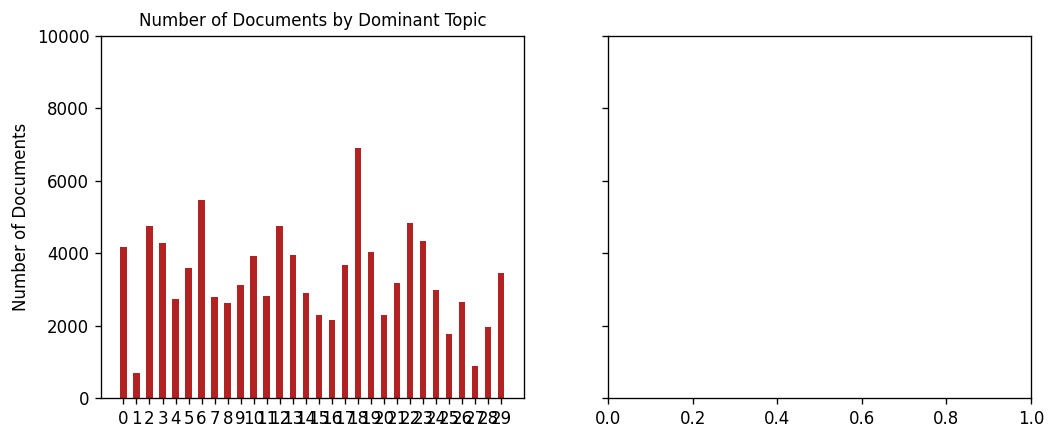

In [92]:
# Topic Distribution by Dominant Topics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
#tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
#ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 10000)

In [98]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=df_agg.text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series(tqdm([int(topic_num), round(prop_topic,4), topic_keywords])), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [99]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df_agg.text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()


100%|██████████| 3/3 [00:00<00:00, 299.49it/s]

100%|██████████| 3/3 [00:00<00:00, 11543.96it/s]

100%|██████████| 3/3 [00:00<00:00, 7598.38it/s]

100%|██████████| 3/3 [00:00<00:00, 8065.97it/s]

100%|██████████| 3/3 [00:00<00:00, 1729.13it/s]

100%|██████████| 3/3 [00:00<00:00, 2183.40it/s]

100%|██████████| 3/3 [00:00<00:00, 12972.07it/s]

100%|██████████| 3/3 [00:00<00:00, 1384.56it/s]

100%|██████████| 3/3 [00:00<00:00, 4660.34it/s]

100%|██████████| 3/3 [00:00<00:00, 7854.50it/s]

100%|██████████| 3/3 [00:00<00:00, 11194.76it/s]

100%|██████████| 3/3 [00:00<00:00, 12620.77it/s]

100%|██████████| 3/3 [00:00<00:00, 7552.77it/s]

100%|██████████| 3/3 [00:00<00:00, 9177.91it/s]

100%|██████████| 3/3 [00:00<00:00, 12145.67it/s]

100%|██████████| 3/3 [00:00<00:00, 5146.39it/s]

100%|██████████| 3/3 [00:00<00:00, 7025.63it/s]

100%|██████████| 3/3 [00:00<00:00, 8594.89it/s]

100%|██████████| 3/3 [00:00<00:00, 10381.94it/s]

100%|██████████| 3/3 [00:00<00:00, 6913.69it/s]

100%|█████████

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [100]:
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic','Topic_Perc_Contrib','Keywords','Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.3156   
1            1            29.0              0.8840   
2            2             3.0              0.8926   
3            3            12.0              0.5922   
4            4             2.0              0.6880   
5            5            13.0              0.6778   
6            6            16.0              0.5078   
7            7             3.0              0.4975   
8            8            23.0              0.6713   
9            9            14.0              0.3008   

                                                                         Keywords  \
0                would, eat, say, cancer, consumption, diet, go, year, much, food   
1                        year, time, taco, first, give, love, one, horse, new, im   
2  eat, eat_meat, animal, every, want, meat_every, dont, kill, people, vegetarian   
3                         say, dont, rid, get, youre, really, good, much, w, like   
4                would, eat, say, cancer, consumption, diet, go, year, much, food   
5                             lot, diet, good, eat, im, go, like, get, also, dead   
6                          food, say, u, god, need, eat, shop, enjoy, kind, watch   
7  eat, eat_meat, animal, every, want, meat_every, dont, kill, people, vegetarian   
8                      like, never, make, people, im, ask, come, ive, think, dont   
9                   ️, rice, loaf, meat_loaf, love, serve, boy, product, get, big   

                                                                                                                                                                                                                                                                                                                                                                                                                                                       Text  
0                                                                                                                                                                                                                                                                                     @jakeshieldsajj Come on, Jake: I'll take factory meat over pasta and cheap bread any day. Pretty sure the purpose of religious rituals is not reduction of suffering.  
1                                                                                                                                         @RandolphWFarme1 @N76247476Man I found out a boss I had was one.  I worked in a meat market, this was over 30 yrs ago.  I was dating a guy who had a son, the little boy next door was his friend.  I took them places with me, one child was white, one child was black.  It got back to me my boss was rascist.  
2                                                                                                                                                                                                                                                                                                                               @Papias42 @NovusOrdoWatch A Catholic who willfully eats meat, thinking it is Friday, but it is really Thursday, still sins.  
3                                                                                                                                                                                                                                                                                                                                                        @JaydisHIM Yamato was riding meat soo hard she changed her name and gender https://t.co/mvibF7X6q7  
4                                                                                                                                                                                                                                                 

In [104]:
#df_dominant_topic.to_excel('df_dominant_topic.xlsx')

In [107]:
df_dominant_topic.Dominant_Topic.value_counts()

18.0    6926
6.0     5465
22.0    4812
2.0     4752
12.0    4729
23.0    4357
3.0     4298
0.0     4187
19.0    4033
13.0    3936
10.0    3935
17.0    3653
5.0     3625
29.0    3449
21.0    3185
9.0     3129
24.0    2972
14.0    2902
11.0    2813
7.0     2793
4.0     2752
26.0    2668
8.0     2618
15.0    2306
20.0    2286
16.0    2166
28.0    1987
25.0    1770
27.0     898
1.0      703
Name: Dominant_Topic, dtype: int64

In [106]:
df_dominant_topic[df_dominant_topic.Dominant_Topic == 18.0]

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
11               11            18.0              0.6299   
14               14            18.0              0.5087   
19               19            18.0              0.5933   
47               47            18.0              0.2854   
53               53            18.0              0.6468   
...             ...             ...                 ...   
100053       100053            18.0              0.4471   
100064       100064            18.0              0.3682   
100088       100088            18.0              0.3808   
100100       100100            18.0              0.6204   
100103       100103            18.0              0.4828   

                                                                       Keywords  \
11      like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
14      like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
19      like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
47      like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
53      like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
...                                                                         ...   
100053  like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
100064  like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
100088  like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
100100  like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   
100103  like, get, look, im, piece, look_like, piece_meat, get_meat, feel, good   

                                                                                                                                                                                                                                                             Text  
11                                                                                                                                                                                            @deadbeatdad100 @SaycheeseDGTL Pieces of meat till their dying days  
14      - Bee babies/grub. \n- Weird experiments that just sound good in writing(Chocolate rolled in chapati/Chocolate and chips). \n- Any meat that's not ready...meat that looks like the cow is somewhere bandaged and on painkillers. https://t.co/ChRWJUnYAk  
19                                                                                                                                   Love it, next time u could even add pork, intestines, bush meat and chicken to complete your mission https://t.co/EG4LEjaNS3  
47                                                                                                      @sweetofloves omg same especially touching any meat or cracking eggs or anything sticky!! as a virgo sun/mercury like i hate feeling anything on my hands  
53                                                                                                                                                                                                @JosieStevensMTR U look good but u need some meat I. Those legs  
...                                                                                                                                                                                                                                                           ...  
100053                                                                                                                                                          Everyone loves the steak meat I be cooking 😌💅 I’m sure I made enough for dinner &amp; for lunch !  
100064              Nah im still pissed people told me i was doing the most when i said that nose job culture was rooted in antisemitism. Anti-intellectualism got yall in a chokehold i fear. That giant lump in your head is

In [56]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics(30,30)]

In [57]:
for id, t in enumerate(words): 
    print(f"------ Topic {id} ------")
    print(' '.join(t), end="\n\n")
    

------ Topic 0 ------
food red red_meat ‘ one process climate use ban protein base find label halal eating scientist make much eat animal fish people need also production dont could change etc time

------ Topic 1 ------
dog dog_meat farm via market shut illegal south meat_farm shut_illegal illegal_dog korea south_korea korea_shut farm_slaughterhouses slaughterhouses_market slaughterhouses petition petition_via change restaurantssign_petition market_restaurantssign restaurantssign shredder via_change restaurant shred market_restaurant claw bear

------ Topic 2 ------
would say cancer eat consumption go much risk let food year study make diet red egg animal meat_consumption cause like less clear red_meat increase health heart also high disease need

------ Topic 3 ------
eat eat_meat animal every want dont meat_every people kill vegetarian vegan day follow meat_eat dont_eat eat_animal go plant one people_eat cant dont_want want_eat get even human know say come think

------ Topic 4 ----

In [716]:
#Code for saving the models

#path = #to the folder in which you want the models saved
path = '/Users/mac/'
pickle.dump(lda_model, open(path+'dansish crwon ldamodel.sav', 'wb'))
pickle.dump(corpus, open(path+'dansish crwon corpus.sav', 'wb'))
pickle.dump(id2word, open(path+'dansish crwon id2word.sav', 'wb'))

In [49]:
lda_model=pickle.load(open('/Users/mac/dansish crwon ldamodel.sav', 'rb'))
corpus=pickle.load(open('/Users/mac/dansish crwon corpus.sav', 'rb'))
id2word=pickle.load(open('/Users/mac/dansish crwon id2word.sav', 'rb'))

In [8]:
lda_model.random_state

RandomState(MT19937) at 0x123C77C40

In [89]:
lda_model.get_topic_terms(1,10) #This returns the 10 words that are most significant for topic 41

[(460, 0.0083925845),
 (333, 0.0063181673),
 (227, 0.0055900654),
 (583, 0.0050799022),
 (172, 0.004901324),
 (197, 0.0047483635),
 (318, 0.004486946),
 (41, 0.0042260485),
 (106, 0.004209976),
 (118, 0.004139716)]

In [50]:
lda_model.get_topics().shape

(30, 3103)

In [52]:
lda_model.

[(617, 0.06547834),
 (853, 0.047772978),
 (257, 0.044042155),
 (1851, 0.042817343),
 (28, 0.03673806),
 (1782, 0.034766406),
 (2297, 0.033347655),
 (366, 0.03149442),
 (2239, 0.03107075),
 (2306, 0.029641014)]

In [497]:
#Creating a dataframe with tokens as columns and topics as rows 

#token2id gets all tokens and their associated id. list(id2word.token2id.keys()) creates a list of just the tokens. 

beta_df = pd.DataFrame(lda_model.get_topics(), columns = list(id2word.token2id.keys()))

In [498]:
#Viewing the dataframe

beta_df.head()

get      get_meat     bread         cheap      come       day  \
0  0.001084  7.939777e-07  0.012373  4.218165e-04  0.001714  0.002861   
1  0.000909  3.845154e-06  0.001574  1.109240e-04  0.002339  0.028529   
2  0.012888  9.700368e-04  0.000021  3.109991e-04  0.001147  0.000942   
3  0.022031  2.347913e-03  0.000355  3.500660e-04  0.005135  0.002612   
4  0.008243  1.674970e-04  0.000634  6.499528e-07  0.003144  0.001747   

        factory           ill      ill_take          jake  ...  say_scientist  \
0  2.809908e-04  3.840593e-04  7.939777e-07  7.939777e-07  ...   7.939777e-07   
1  4.435297e-06  2.874438e-04  7.299491e-07  7.299491e-07  ...   7.299491e-07   
2  2.206612e-06  4.665399e-07  4.665399e-07  4.665399e-07  ...   4.665399e-07   
3  6.024575e-07  1.917947e-04  6.024575e-07  6.024575e-07  ...   6.024575e-07   
4  6.499528e-07  6.499528e-07  6.499528e-07  6.499528e-07  ...   6.499528e-07   

     pyeongtaek  pyeongtaek_south   meat_hoodie  ill_differently  \
0  7.939777e-07      7.939777e-07  7.939777e-07     7.939777e-07   
1  7.299491e-07      7.299491e-07  7.299491e-07     7.299491e-07   
2  4.665399e-07      4.665399e-07  4.665399e-07     4.665399e-07   
3  6.024575e-07      6.024575e-07  6.024575e-07     6.024575e-07   
4  6.499528e-07      6.499528e-07  6.499528e-07     6.499528e-07   

         –_tell         ‘_ill        chenle        nonsan  nonsan_south  
0  7.939777e-07  7.939777e-07  7.939777e-07  7.939777e-07  7.939777e-07  
1  7.299491e-07  7.299491e-07  7.299491e-07  7.299491e-07  7.299491e-07  
2  4.665399e-07  4.665399e-07  4.665399e-07  4.665399e-07  4.665399e-07  
3  6.024575e-07  6.024575e-07  6.024575e-07  6.024575e-07  6.024575e-07  
4  6.499528e-07  6.499528e-07  6.499528e-07  6.499528e-07  6.499528e-07  

[5 rows x 4814 columns]

In [499]:
#Uncomment to see the 10 words with the largest beta values for each topic 

for i in range(10): 
    print(beta_df.iloc[i].nlargest(10),"\n___\n")

#A note on the results: You may notice that some topics have an even distributions of probabilities for all terms. 
#This may be because the `minimum_probability` parameter is not low enough, 
#    because we do not have enough `passes` and `iterations` and the algorithm has thus not converged properly, 
#    or because we have set the number of topics too high for the data. 
#    For your own projects, experiment with the parameters. 

-            0.219552
-_-          0.018590
bread        0.012373
meat_-       0.011204
hamburger    0.010332
food         0.009481
etc          0.008830
link         0.008431
hi           0.008011
would        0.007692
Name: 0, dtype: float32 
___

eat           0.057999
christmas     0.053848
day           0.028529
sauce         0.023575
red           0.019330
lot           0.018083
red_meat      0.014491
eat_red       0.013780
meat_sauce    0.011384
lot_meat      0.011019
Name: 1, dtype: float32 
___

people         0.038519
less           0.022811
eat            0.020933
white          0.013775
get            0.012888
eat_less       0.012732
think          0.012193
tell_people    0.010302
like           0.010189
white_meat     0.009865
Name: 2, dtype: float32 
___

man          0.038881
loaf         0.027934
im           0.026800
meat_loaf    0.024558
get          0.022031
#meat        0.011898
hell         0.011565
go           0.011084
fuck         0.010720
time         0.010459


In [110]:
# plt.figure(figsize = (12,8))

# ax = sns.barplot(x = beta_df.iloc[1].nlargest(10).values, 
#                  y = beta_df.iloc[1].nlargest(10).index, 
#                  orient = 'h')

# plt.title('10 largest beta values for topic 1', fontsize = 14)
# plt.show()

In [111]:
# #Picking 10 topics to visualize
# topics = [0,1,2,3,4,5,6,7,8,9]

# fig, axes = plt.subplots(ncols=2, nrows=5, figsize = (16,30)) #Setting 10 subplots and determining figure size
# fig.tight_layout(pad=8.0) #This ensure space between the subplots so the text can more easily be read
    
# for ax, topic in zip(axes.flatten(), topics): #Iterates through the axes and the topics
    
#     #Creates 10 barplots with x as the beta values and y as the words
#     sns.barplot(ax = ax, 
#                 x = beta_df.iloc[topic].nlargest(10).values, 
#                 y = beta_df.iloc[topic].nlargest(10).index, 
#                 orient = 'h')
    
#     ax.set(title='Topic {}'.format(topic), xlabel='beta')

# plt.show()

In [112]:
#Insert the corpus of documents in bag of word format and get an array of (document, topic, probability). 

# document_topics = np.array(lda_model.get_document_topics(corpus, minimum_probability=0.0)) 


In [113]:
#Uncomment to view gamma values for the first document

#print(document_topics.shape)
#document_topics[0]


In [114]:
#Creating a list of names for all 50 topics
# topics = ['topic_{}'.format(t) for t in range(0,10)]

# #Creating a dataframe of gamma probabilities 
# gamma_probs = pd.DataFrame(document_topics[:,:,1], columns = topics)

In [116]:
#Merging with the original dataframe 
# gamma_df = pd.concat((df_agg,gamma_probs), axis = 1)

# #Viewing the concatenated dataframe
# gamma_df

In [117]:
#Setting a theme
# sns.set_theme(style="darkgrid")

# #Plotting a figure and setting figure size
# plt.figure(figsize = (14,8))

# #Choosing colors
# palette = ['blue','red'] 

# #Plotting the covid topic for the full dataset
# sns.barplot(x = 'gender', y = 'topic_1', data = gamma_df, palette = palette)

# plt.title('Topic 1 gender distribution', fontsize = 16)
# plt.ylabel('Topic prevalence')
# plt.xlabel('Date')

# plt.show()